In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/data_energy.csv")

#### check the data

In [3]:
df.head(5)

,LCLid,Date,KWH
0,MAC000002,2012/10/12,7.098
1,MAC000002,2012/10/13,11.087
2,MAC000002,2012/10/14,13.223
3,MAC000002,2012/10/15,10.257
4,MAC000002,2012/10/16,9.769


In [4]:
df.tail(5)

,LCLid,Date,KWH
1048570,MAC001564,2012/11/7,25.492
1048571,MAC001564,2012/11/8,14.075
1048572,MAC001564,2012/11/9,20.408
1048573,MAC001564,2012/11/10,14.889
1048574,MAC001564,2012/11/11,9.448


#### select the right time range

In [5]:
date_group_counts = df.groupby('Date').size()
print(date_group_counts)

Date
2011/11/23      13
2011/11/24      25
2011/11/25      32
2011/11/26      41
2011/11/27      41
              ... 
2014/2/5      1389
2014/2/6      1389
2014/2/7      1389
2014/2/8      1389
2014/2/9      1388
Length: 829, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_35040\2635626500.py:15: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(above_5000.index, above_5000.values, marker='o', linestyle='-', color=red_color, label='Household > 5000')


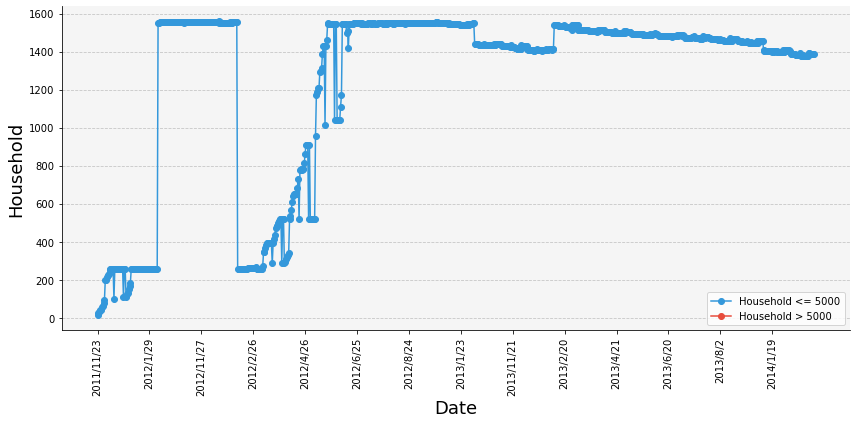

In [7]:
import matplotlib.pyplot as plt

# 假设你的 df 和 date_group_counts 已经定义好

plt.figure(figsize=(12, 6))

above_5000 = date_group_counts[date_group_counts > 5000]
below_5000 = date_group_counts[date_group_counts <= 5000]

# 更好的颜色选择
blue_color = '#3498db'  # 深蓝色
red_color = '#e74c3c'   # 鲜红色

plt.plot(below_5000.index, below_5000.values, marker='o', linestyle='-', color=blue_color, label='Household <= 5000')
plt.plot(above_5000.index, above_5000.values, marker='o', linestyle='-', color=red_color, label='Household > 5000')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Household', fontsize = 18)
#plt.title('Household Participation in Project over Time', fontsize=16)
plt.xticks(date_group_counts.index[::60], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# 添加边框和背景色
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#f5f5f5')  # 浅灰色背景

plt.tight_layout()

# 保存图表为图片文件（可选）
# plt.savefig('data_size_over_time.png', dpi=300)

plt.show()


In [7]:
date_group_counts = df.groupby('Date').size()

# 找到第一个高于 5000 的日期
first_above_5000_date = date_group_counts[date_group_counts > 5000].index[0]

print("The first date with size above 5000:", first_above_5000_date)


The first date with size above 5000: 2012-09-28


In [8]:
date_group_counts.tail(10)

Date
2014-02-19    5008
2014-02-20    5006
2014-02-21    5004
2014-02-22    5006
2014-02-23    4998
2014-02-24    4994
2014-02-25    4995
2014-02-26    4993
2014-02-27    4990
2014-02-28    4987
dtype: int64

### Data from 2012-09-28 to 2014-02-22

In [9]:
start_date = '2012-09-28'
end_date = '2014-02-22'

# 将 'Date' 列转换为日期时间格式，以便进行比较
df['Date'] = pd.to_datetime(df['Date'])

# 使用条件筛选，保留在指定日期范围内的数据
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [10]:
df.head(5)

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


In [11]:
df.tail(5)

,LCLid,Date,KWH
3510422,MAC005567,2014-02-18,3.718
3510423,MAC005567,2014-02-19,3.745
3510424,MAC005567,2014-02-20,4.232
3510425,MAC005567,2014-02-21,3.580
3510426,MAC005567,2014-02-22,3.669


In [12]:
df.shape

(2724925, 3)

#### The leftover data is from 2012-09-28 to 2014-02-22

In [13]:
df['LCLid'].nunique()

5566

In [14]:
df['ID_Number'] = df['LCLid'].str.extract(r'(\d+)')

In [15]:
df['ID_Number']

0          000002
1          000002
2          000002
3          000002
4          000002
            ...  
3510422    005567
3510423    005567
3510424    005567
3510425    005567
3510426    005567
Name: ID_Number, Length: 2724925, dtype: object

In [16]:
df['ID_Number'].dtypes

dtype('O')

In [17]:
df['ID_Number'] = df['ID_Number'].astype(int)

In [18]:
df['ID_Number'].dtypes

dtype('int32')

In [19]:
df['ID_Number']

0             2
1             2
2             2
3             2
4             2
           ... 
3510422    5567
3510423    5567
3510424    5567
3510425    5567
3510426    5567
Name: ID_Number, Length: 2724925, dtype: int32

In [20]:
df.head(5)

,LCLid,Date,KWH,ID_Number
0,MAC000002,2012-10-12,7.098,2
1,MAC000002,2012-10-13,11.087,2
2,MAC000002,2012-10-14,13.223,2
3,MAC000002,2012-10-15,10.257,2
4,MAC000002,2012-10-16,9.769,2


In [21]:
df.tail(5)

,LCLid,Date,KWH,ID_Number
3510422,MAC005567,2014-02-18,3.718,5567
3510423,MAC005567,2014-02-19,3.745,5567
3510424,MAC005567,2014-02-20,4.232,5567
3510425,MAC005567,2014-02-21,3.580,5567
3510426,MAC005567,2014-02-22,3.669,5567


#### 分组

In [22]:
df['group'] = (df['ID_Number']//100)+1

In [23]:
df.head(5)

,LCLid,Date,KWH,ID_Number,group
0,MAC000002,2012-10-12,7.098,2,1
1,MAC000002,2012-10-13,11.087,2,1
2,MAC000002,2012-10-14,13.223,2,1
3,MAC000002,2012-10-15,10.257,2,1
4,MAC000002,2012-10-16,9.769,2,1


In [24]:
df.tail(5)

,LCLid,Date,KWH,ID_Number,group
3510422,MAC005567,2014-02-18,3.718,5567,56
3510423,MAC005567,2014-02-19,3.745,5567,56
3510424,MAC005567,2014-02-20,4.232,5567,56
3510425,MAC005567,2014-02-21,3.580,5567,56
3510426,MAC005567,2014-02-22,3.669,5567,56


#### 删掉第56组

In [25]:
df = df[df['group'] != 56]

#### 删掉不需要的ID_Number

In [26]:
del df['ID_Number']

In [27]:
df.head(10)

,LCLid,Date,KWH,group
0,MAC000002,2012-10-12,7.098,1
1,MAC000002,2012-10-13,11.087,1
2,MAC000002,2012-10-14,13.223,1
3,MAC000002,2012-10-15,10.257,1
4,MAC000002,2012-10-16,9.769,1
5,MAC000002,2012-10-17,10.885,1
6,MAC000002,2012-10-18,10.751,1
7,MAC000002,2012-10-19,8.431,1
8,MAC000002,2012-10-20,17.578,1
9,MAC000002,2012-10-21,24.490,1


In [28]:
df.tail(10)

,LCLid,Date,KWH,group
3469650,MAC005499,2014-02-13,11.207,55
3469651,MAC005499,2014-02-14,8.908,55
3469652,MAC005499,2014-02-15,9.169,55
3469653,MAC005499,2014-02-16,11.510,55
3469654,MAC005499,2014-02-17,7.858,55
3469655,MAC005499,2014-02-18,7.507,55
3469656,MAC005499,2014-02-19,9.291,55
3469657,MAC005499,2014-02-20,10.029,55
3469658,MAC005499,2014-02-21,13.303,55
3469659,MAC005499,2014-02-22,9.622,55


In [29]:
df.shape
# now we have 2693838

(2693838, 4)

#### 合并每一组 这样就变成了 某组在某天的能源消耗

In [30]:
grouped_df = df.groupby(['group', 'Date'])['KWH'].sum().reset_index()

In [31]:
print(grouped_df)

       group       Date       KWH
0          1 2012-09-28   920.374
1          1 2012-09-29   946.774
2          1 2012-09-30   997.614
3          1 2012-10-01   932.968
4          1 2012-10-02   923.616
...      ...        ...       ...
28148     55 2014-02-18  1008.297
28149     55 2014-02-19  1009.979
28150     55 2014-02-20  1014.618
28151     55 2014-02-21   955.054
28152     55 2014-02-22  1021.862

[28153 rows x 3 columns]


In [32]:
# 将Date列转换为日期时间格式
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'])

grouped_df['Next_3_Days_Energy_Total'] = grouped_df.groupby('group')['KWH'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)

# 移动未来三天能耗总量的数据，使其对应未来三天
grouped_df['Next_3_Days_Energy_Total'] = grouped_df.groupby('group')['Next_3_Days_Energy_Total'].shift(-3)


In [33]:
grouped_df

,group,Date,KWH,Next_3_Days_Energy_Total
0,1,2012-09-28,920.374,959.118667
1,1,2012-09-29,946.774,951.399333
2,1,2012-09-30,997.614,919.995000
3,1,2012-10-01,932.968,918.231000
4,1,2012-10-02,923.616,950.022667
...,...,...,...,...
28148,55,2014-02-18,1008.297,993.217000
28149,55,2014-02-19,1009.979,997.178000
28150,55,2014-02-20,1014.618,NaN
28151,55,2014-02-21,955.054,NaN


In [34]:
# 统计每列中的NaN数量
nan_counts = grouped_df.isna().sum()

print(nan_counts)

group                         0
Date                          0
KWH                           0
Next_3_Days_Energy_Total    165
dtype: int64


In [35]:
df_clean = grouped_df.dropna()

In [36]:
print(df_clean)

       group       Date       KWH  Next_3_Days_Energy_Total
0          1 2012-09-28   920.374                959.118667
1          1 2012-09-29   946.774                951.399333
2          1 2012-09-30   997.614                919.995000
3          1 2012-10-01   932.968                918.231000
4          1 2012-10-02   923.616                950.022667
...      ...        ...       ...                       ...
28145     55 2014-02-15  1124.513               1070.176000
28146     55 2014-02-16  1165.853               1018.218000
28147     55 2014-02-17  1036.378               1010.964667
28148     55 2014-02-18  1008.297                993.217000
28149     55 2014-02-19  1009.979                997.178000

[27988 rows x 4 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_46716\2110837324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


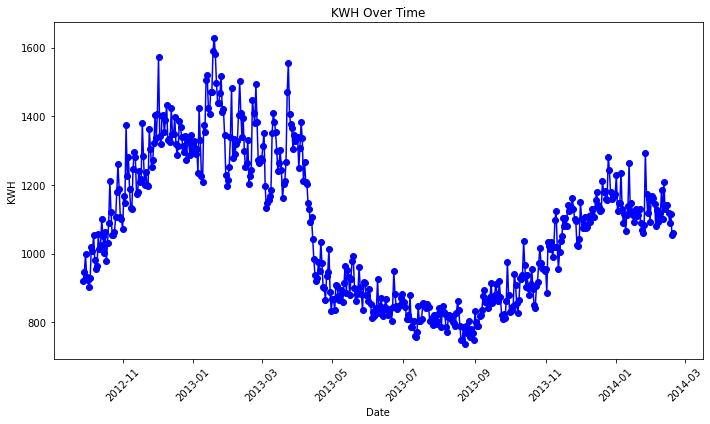

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的DataFrame名为df

# 将Date列转换为日期时间格式
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

df_group1 = df_clean[df_clean['group'] == 1]

# 创建一个折线图
plt.figure(figsize=(10, 6))  # 设置图形大小（可选）

# 绘制折线图
plt.plot(df_group1['Date'], df_group1['KWH'], marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('KWH Over Time')
plt.xlabel('Date')
plt.ylabel('KWH')

# 格式化日期显示
plt.xticks(rotation=45)

# 显示图形
plt.tight_layout()  # 自动调整布局
plt.show()


#### remove the outlier 

In [38]:
def remove_outliers(df, col_name, method='iqr', k = 0):
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + k*iqr
    lower_threshold = q1 - k*iqr
    outliers = (df[col_name] > upper_threshold) | (df[col_name] < lower_threshold)
    
    df.loc[outliers, col_name] = None  # Set outlier values to None or NaN
    return df

In [39]:
col = ['KWH']

for col in df_clean[col]:
    df = remove_outliers(df_clean, col, method='iqr', k=1.5)

In [40]:
df.shape

(27988, 4)

In [41]:
df.to_csv('D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_data_energy.csv', index=False)